# Google Analytics Customer Revenue Prediction

## Presenting the Initial Data 

<b>Data Fields:</b><br>
<b>fullVisitorIdv</b> - A unique identifier for each user of the Google Merchandise Store. <br>
<b>channelGrouping</b> - The channel from which the user came to the Store.<br>
<b>date</b> - The date on which the user visited the Store.<br>
<b>device</b> - The specifications for the device used to access the Store.<br>
<b>geoNetwork</b> - This section contains information about the geography of the user.<br>
<b>sessionId</b> - A unique identifier for this visit to the store.<br>
<b>socialEngagementType</b> - Engagement type, either "Socially Engaged" or "Not Socially Engaged".<br>
<b>totals</b> - This section contains aggregate values across the session.<br>
<b>trafficSource</b> - This section contains information about the Traffic Source from which the session originated.<br>
<b>visitId</b> - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.<br>
<b>visitNumber</b> - The session number for this user. If this is the first session, then this is set to 1.<br>
<b>visitStartTime</b> - The timestamp (expressed as POSIX time).<br>

First of all, the data are in Json format, so we will need to handle that. I will use a chunk that I saw in almost all kernels of this competition.

# Objectives

- I will explore if we have some difference between the browsers and if the browser is significant to predict sales. <br>
- Which countriess and continents have more acesses and sales? How is it distributed?  <br>
- Which type of device is most common in our dataset?<br>
- What is the mobile percentage of accesses? <br>
- Which is the most frequent Operational System? <br>
- What is the most frequent channelGrouping?<br> 
- What is the the weekday, month, day, year with the highest number of accesses and revenue? 

And another bunch of ideas that I will have when start exploring.




## Importing Necessary Libraries

In [1]:
# Necessary librarys
import os # it's a operational system library, to set some informations
import random # random is to generate random values

import pandas as pd # to manipulate data frames 
import numpy as np # to work with matrix
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values

import matplotlib.pyplot as plt # to graphics plot
import seaborn as sns # a good library to graphic plots
import squarify # to better understand proportion of categorys - it's a treemap layout algorithm

# Importing librarys to use on interactive graphs
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

import json # to convert json in df
from pandas import json_normalize # to normalize the json file

# to set a style to all graphs
plt.style.use('fivethirtyeight')
init_notebook_mode(connected=True)

## Some Columns Are in JSON Format So It Will Be Necessary to Deal With This Problem.

I will use a chunk of code  that almost all kernels are using. I dont know who did first, but I found it on SRK kernel and I made some modifications.

In [2]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] # Columns that have json format

dir_path = "" # you can change to your local 

# p is a fractional number to skiprows and read just a random sample of the our dataset. 
p = 0.07 # *** In this case we will use 50% of data set *** #

#Code to transform the json format columns in table
def json_read(df):
    #joining the [ path + df received]
    data_frame = dir_path + df
    
    #Importing the dataset
    df = pd.read_csv(data_frame, 
                     converters={column: json.loads for column in columns}, # loading the json columns properly
                     dtype={'fullVisitorId': 'str'}, # transforming this column to string
                     skiprows=lambda i: i>0 and random.random() > p)# Number of rows that will be imported randomly
    
    for column in columns: #loop to finally transform the columns in data frame
        #It will normalize and set the json to a table
        column_as_df = json_normalize(df[column]) 
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    # Printing the shape of dataframes that was imported     
    print(f"Loaded {os.path.basename(data_frame)}. Shape: {df.shape}")
    return df # returning the df after importing and transforming

# Importing the Datasets

In [3]:
%%time 
# %%time is used to calculate the timing of code chunk execution #

# We will import the data using the name and extension that will be concatenated with dir_path
df_train = json_read("template_bh/data/train.csv") 
# The same to test dataset
#df_test = json_read("test.csv") 

Loaded train.csv. Shape: (62916, 54)
CPU times: user 7.87 s, sys: 317 ms, total: 8.19 s
Wall time: 8.19 s


Nice. After the import and transformation, we have 54 columns. Now, let's see our data and handle with problemns that we will find.

In [4]:
# This command shows the first 5 rows of our dataset
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
0,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,2222266935962032743,2222266935962032743_1472826820,Not Socially Engaged,1472826820,1,1472826820,Internet Explorer,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,8794587387581803040,8794587387581803040_1472816048,Not Socially Engaged,1472816048,1,1472816048,Internet Explorer,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Referral,20160902,9272032681239045735,9272032681239045735_1472829309,Not Socially Engaged,1472829309,1,1472829309,Chrome,not available in demo dataset,...,NaN,not available in demo dataset,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's interesting because we can see that <b>SessionId</b> has the <b>fullVisitorId</b> and <b>VisitStartTime</b> and <b>visitId</b>.

Also, we need to transform the date column in datetime format and extract other datetime information contained in the columns that I quoted above.

## Knowing the Missing Values

In [5]:
# code chunk that I saw in Gabriel Preda kernel
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (data.isnull().sum() / data.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total columns at least one Values: ")
    print (df[~(df['Total'] == 0)]) # Returning values of nulls different of 0
    
    print("\n Total of Sales % of Total: ", round((df_train[df_train['totals.transactionRevenue'] != np.nan]['totals.transactionRevenue'].count() / len(df_train['totals.transactionRevenue']) * 100),4))
    
    return 

In [6]:
# calling the missing values function
missing_values(df_train) 

Total columns at least one Values: 
                                              Total    Percent
trafficSource.adContent                       62156  98.792040
totals.transactionRevenue                     62069  98.653761
trafficSource.adwordsClickInfo.adNetworkType  61408  97.603153
trafficSource.adwordsClickInfo.slot           61408  97.603153
trafficSource.adwordsClickInfo.page           61408  97.603153
trafficSource.adwordsClickInfo.isVideoAd      61408  97.603153
trafficSource.adwordsClickInfo.gclId          61403  97.595206
trafficSource.isTrueDirect                    43742  69.524445
trafficSource.referralPath                    39754  63.185835
trafficSource.keyword                         35152  55.871320
totals.bounces                                31394  49.898277
totals.newVisits                              14223  22.606332
totals.pageviews                                  8   0.012715

 Total of Sales % of Total:  1.3462


### Nice. We can see that we have: <br>
Our target has just 1.3% of non-null values  <br> 
6 columns with 97%+ of missing values  <br>
4 columns with 50%+ of missing values <br>
1 column with 22.22%  <br>
1 column with 0.004% <br> 

We will explore further to understand what it looks like.
                                          

## Let's Take a Look on Data Types of All Columns

- If you want see the code click in "code"
- If you want see the ouput click in "output"

In [7]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62916 entries, 0 to 62915
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   channelGrouping                                    62916 non-null  object
 1   date                                               62916 non-null  int64 
 2   fullVisitorId                                      62916 non-null  object
 3   sessionId                                          62916 non-null  object
 4   socialEngagementType                               62916 non-null  object
 5   visitId                                            62916 non-null  int64 
 6   visitNumber                                        62916 non-null  int64 
 7   visitStartTime                                     62916 non-null  int64 
 8   device.browser                                     62916 non-null  object
 9   device.browserVer

## Nice! 

Data Types contained in our dataframe: <br>
- bool(1) <br>
- int64(4) <br>
- object(49) <br>

## Creating the Function to Handle with Date 

In [8]:
# library of datetime
from datetime import datetime

# This function is to extract date features
def date_process(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # seting the column as pandas datetime
    df["_weekday"] = df['date'].dt.weekday #extracting week day
    df["_day"] = df['date'].dt.day # extracting day
    df["_month"] = df['date'].dt.month # extracting day
    df["_year"] = df['date'].dt.year # extracting day
    df['_visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    
    return df #returning the df after the transformations

In [9]:
### Calling the function 

In [10]:
df_train = date_process(df_train) #calling the function that we created above

df_train.head(n=2) #printing the first 2 rows of our dataset

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,_weekday,_day,_month,_year,_visitHour
0,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,4,2,9,2016,22
1,Organic Search,2016-09-02,2222266935962032743,2222266935962032743_1472826820,Not Socially Engaged,1472826820,1,1472826820,Internet Explorer,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,4,2,9,2016,11


Before looking at the unique values in each column, I will drop the constant values that are not useful and will make the df lighter. To do this, I will need to give some attention to numerical values

In the following code, I define some functions that I will use to call clean the data.
- If you want see, click on "code"

In [11]:
def FillingNaValues(df):    # fillna numeric feature
    df['totals.pageviews'].fillna(1, inplace=True).astype(int) #filling NA's with 1
    df['totals.newVisits'].fillna(0, inplace=True).astype(int) #filling NA's with 0
    df['totals.bounces'].fillna(0, inplace=True).astype(int)   #filling NA's with 0
    df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
    df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
    df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df_train.loc[df_train['geoNetwork.city'] == "(not set)", 'geoNetwork.city'] = np.nan
    df_train['geoNetwork.city'].fillna("NaN", inplace=True)

    return df #return the transformed dataframe

In [12]:
def NumericalColumns(df):    # fillna numeric feature
    df['totals.pageviews'].fillna(1, inplace=True) #filling NA's with 1
    df['totals.newVisits'].fillna(0, inplace=True) #filling NA's with 0
    df['totals.bounces'].fillna(0, inplace=True)   #filling NA's with 0
    df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
    df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
    df['totals.pageviews'] = df['totals.pageviews'].astype(int) # setting numerical column as integer
    df['totals.newVisits'] = df['totals.newVisits'].astype(int) # setting numerical column as integer
    df['totals.bounces'] = df['totals.bounces'].astype(int)  # setting numerical column as integer
    df["totals.hits"] = df["totals.hits"].astype(float) # setting numerical to float
    df['totals.visits'] = df['totals.visits'].astype(int) # seting as int

    return df #return the transformed dataframe

Normalize

In [13]:
from sklearn import preprocessing

def Normalizing(df):
    # Use MinMaxScaler to normalize the column
    df["totals.hits"] =  (df['totals.hits'] - min(df['totals.hits'])) / (max(df['totals.hits'])  - min(df['totals.hits']))
    # normalizing the transaction Revenue
    df['totals.transactionRevenue'] = df_train['totals.transactionRevenue'].apply(lambda x: np.log1p(x))
    # return the modified df
    return df 

### Let's Investigate Some Constant Columns

In [14]:
# We will takeoff all columns where we have a unique value (constants)
# It is useful because this columns don't give us none information
discovering_consts = [col for col in df_train.columns if df_train[col].nunique() == 1]

# printing the total of columns dropped and the name of columns 
print("Columns with just one value: ", len(discovering_consts), "columns")
print("Name of constant columns: \n", discovering_consts)

Columns with just one value:  24 columns
Name of constant columns: 
 ['socialEngagementType', 'device.browserVersion', 'device.browserSize', 'device.operatingSystemVersion', 'device.mobileDeviceBranding', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.flashVersion', 'device.language', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'totals.bounces', 'totals.newVisits', 'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.isTrueDirect', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.isVideoAd']


In [15]:
#Here are all columns that the unique value is 'not available in demo dataset'

not_aval_cols = ['socialEngagementType','device.browserSize','device.browserVersion', 'device.flashVersion', 
                 'device.language' ,'device.mobileDeviceBranding', 'device.mobileDeviceInfo','device.mobileDeviceMarketingName',
                 'device.mobileDeviceModel', 'device.mobileInputSelector' , 'device.operatingSystemVersion','device.screenColors',
                 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude' ,'geoNetwork.longitude',
                 'geoNetwork.networkLocation','trafficSource.adwordsClickInfo.criteriaParameters']

# It's Useful To Know That We Have 23 Constant Columns

- Below, I will set a function to better investigate our data and correctly categorize them.


In [16]:
# seting the function to show 
def knowningData(df, data_type=object, limit=3): #seting the function with df, 
    n = df.select_dtypes(include=data_type) #selecting the desired data type
    for column in n.columns: #initializing the loop
        print("##############################################")
        print("Name of column ", column, ': \n', "Uniques: ", df[column].unique()[:limit], "\n",
              " | ## Total nulls: ", (round(df[column].isnull().sum() / len(df[column]) * 100,2)),
              " | ## Total unique values: ", df_train.nunique()[column]) #print the data and % of nulls)
        # print("Percentual of top 3 of: ", column)
        # print(round(df[column].value_counts()[:3] / df[column].value_counts().sum() * 100,2))
        print("#############################################")


### I Will Categorize by Object Data Type. <br>
Click on "Output" to see the result 

In [17]:
# calling our function: object is default
knowningData(df_train)

##############################################
Name of column  channelGrouping : 
 Uniques:  ['Organic Search' 'Referral' 'Direct'] 
  | ## Total nulls:  0.0  | ## Total unique values:  8
#############################################
##############################################
Name of column  fullVisitorId : 
 Uniques:  ['3895546263509774583' '2222266935962032743' '9674781571160116268'] 
  | ## Total nulls:  0.0  | ## Total unique values:  60486
#############################################
##############################################
Name of column  sessionId : 
 Uniques:  ['3895546263509774583_1472865386' '2222266935962032743_1472826820'
 '9674781571160116268_1472804607'] 
  | ## Total nulls:  0.0  | ## Total unique values:  62914
#############################################
##############################################
Name of column  socialEngagementType : 
 Uniques:  ['Not Socially Engaged'] 
  | ## Total nulls:  0.0  | ## Total unique values:  1
###########################

Name of column  totals.transactionRevenue : 
 Uniques:  [nan '63840000' '11960000'] 
  | ## Total nulls:  98.65  | ## Total unique values:  630
#############################################
##############################################
Name of column  trafficSource.campaign : 
 Uniques:  ['(not set)' 'AW - Dynamic Search Ads Whole Site' 'Data Share Promo'] 
  | ## Total nulls:  0.0  | ## Total unique values:  8
#############################################
##############################################
Name of column  trafficSource.source : 
 Uniques:  ['google' 'googleweblight.com' 'siliconvalley.about.com'] 
  | ## Total nulls:  0.0  | ## Total unique values:  138
#############################################
##############################################
Name of column  trafficSource.medium : 
 Uniques:  ['organic' 'referral' '(none)'] 
  | ## Total nulls:  0.0  | ## Total unique values:  7
#############################################
##############################################

### Printing Integers

In [18]:
knowningData(df_train, data_type=int)

##############################################
Name of column  visitId : 
 Uniques:  [1472865386 1472826820 1472804607] 
  | ## Total nulls:  0.0  | ## Total unique values:  62829
#############################################
##############################################
Name of column  visitNumber : 
 Uniques:  [1 2 4] 
  | ## Total nulls:  0.0  | ## Total unique values:  200
#############################################
##############################################
Name of column  visitStartTime : 
 Uniques:  [1472865386 1472826820 1472804607] 
  | ## Total nulls:  0.0  | ## Total unique values:  62830
#############################################
##############################################
Name of column  _weekday : 
 Uniques:  [4 3 6] 
  | ## Total nulls:  0.0  | ## Total unique values:  7
#############################################
##############################################
Name of column  _day : 
 Uniques:  [ 2 26 23] 
  | ## Total nulls:  0.0  | ## Total unique values

### Printing Float

In [19]:
knowningData(df_train, data_type=float)

We haven't seen float datatype yet. <br>

## I Will Drop Some of These Features and Fill N/A or Missing in Some of Them

In [20]:
to_drop = ["socialEngagementType",'device.browserVersion', 'device.browserSize', 'device.flashVersion', 'device.language', 
           'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
           'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 
           'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude','geoNetwork.networkLocation', 
           'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adwordsClickInfo.gclId', 'trafficSource.campaign',
           'trafficSource.adwordsClickInfo.page', 'trafficSource.referralPath', 'trafficSource.adwordsClickInfo.slot',
           'trafficSource.adContent', 'trafficSource.keyword']




In [21]:
df_train.drop(to_drop, axis=1, inplace=True)

In [22]:
print("Total features dropped: ", len(to_drop))
print("Shape after dropping: ", df_train.shape)

Total features dropped:  25
Shape after dropping:  (62916, 34)


In [23]:
# call the function to transform the numerical columns
df_train = NumericalColumns(df_train)

# Call the function that will normalize some features
df_train = Normalizing(df_train)

# Checking for Mistakes

for c in dummy_feaures:
    if c in to_drop: print(c)

### Let's See the Unique Values in Our Dataset. <br>

- If you want see, click in "Output"

In [24]:
# We will takeoff all columns where we have a unique value
# It is useful because this columns don't give us none information
clean_consts = [col for col in df_train.columns if df_train[col].nunique() == 1]


# this function drop all constant columns, inplacing the data 
df_train.drop('trafficSource.adwordsClickInfo.adNetworkType', axis=1, inplace=True) 

# printing the total of columns dropped and the name of columns 
print("This useful action will drop: ", len(clean_consts), "columns")
print("All dropped columns: \n", clean_consts)

This useful action will drop:  2 columns
All dropped columns: 
 ['totals.visits', 'trafficSource.adwordsClickInfo.adNetworkType']


The output show us `totals.visits` and `trafficSource.adwordsClickInfo.adNetworkType`, but `totals.visits` can be useful, so I will drop just `trafficSource` feature.

In [25]:
df_train.nunique()

channelGrouping                                 8
date                                          366
fullVisitorId                               60486
sessionId                                   62914
visitId                                     62829
visitNumber                                   200
visitStartTime                              62830
device.browser                                 32
device.operatingSystem                         15
device.isMobile                                 2
device.deviceCategory                           3
geoNetwork.continent                            6
geoNetwork.subContinent                        22
geoNetwork.country                            182
geoNetwork.region                             321
geoNetwork.metro                               79
geoNetwork.city                               503
geoNetwork.networkDomain                     5686
totals.visits                                   1
totals.hits                                   148


Excellent. Now we don't have any constant values.

### Based on This Output, I Will Select and Set a Variable with All Features by Category

In [26]:
'trafficSource.adwordsClickInfo.adNetworkType'

'trafficSource.adwordsClickInfo.adNetworkType'

In [27]:
dummy_feaures =['channelGrouping', 'device.browser', 'device.deviceCategory', 'geoNetwork.city', 'device.operatingSystem', 
                'trafficSource.medium', 'trafficSource.source',
                'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region', 
                'geoNetwork.subContinent']


numericals = ['totals.visits', '_visitHour', '_day', '_month', '_weekday']

# First, Let's See the Distribuition of Transactions Revenues

I will start exploring the quantile.

Transaction Revenue Min Value:  14.200773639026796
Transaction Revenue Mean Value:  17.772559697883835
Transaction Revenue Median Value:  17.665019679293362
Transaction Revenue Max Value:  21.94374171366645


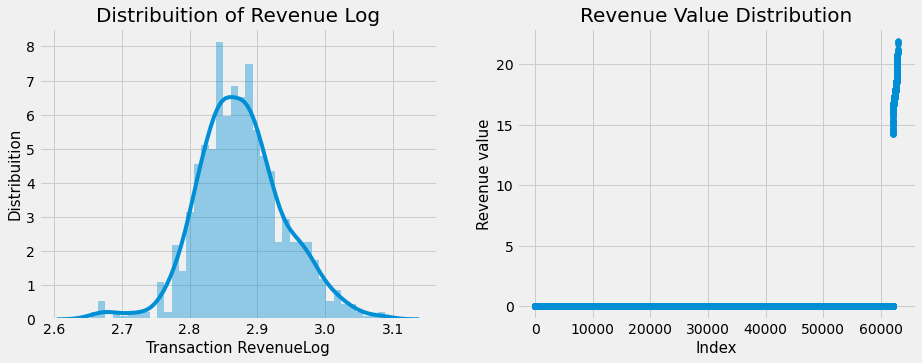

In [28]:
# Printing some statistics of our data
print("Transaction Revenue Min Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].min()) # printing the min value
print("Transaction Revenue Mean Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].mean()) # mean value
print("Transaction Revenue Median Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].median()) # median value
print("Transaction Revenue Max Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].max()) # the max value

# It I did to plot the quantiles but are not working
#print(round(df_train['totals.transactionRevenue'].quantile([.025,.25,.5,.75,.975]),2))

# seting the figure size of our plots
plt.figure(figsize=(14,5))

# Subplot allow us to plot more than one 
# in this case, will be create a subplot grid of 2 x 1
plt.subplot(1,2,1)
# seting the distribuition of our data and normalizing using np.log on values highest than 0 and + 
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(np.log(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"] + 0.01), bins=40, kde=True)
ax.set_xlabel('Transaction RevenueLog', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue Log", fontsize=20) #seting the title and size of font

# setting the second plot of our grid of graphs
plt.subplot(1,2,2)
# ordering the total of users and seting the values of transactions to understanding 
plt.scatter(range(df_train.shape[0]), np.sort(df_train['totals.transactionRevenue'].values))
plt.xlabel('Index', fontsize=15) # xlabel and size of words
plt.ylabel('Revenue value', fontsize=15) # ylabel and size of words
plt.title("Revenue Value Distribution", fontsize=20) # Setting Title and fontsize

plt.show()

Nice distribution... We have very high values on the Transactions Revenue. 


## Kurtosis and Skewness of Transaction Revenue

Skew and Kurtosis are two important statistics terms you need to know.


## Skewness

Skewness is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.

It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.

<b>Positive Skewness </b>means the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

<b>Negative Skewness </b> is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

#### So, When Is the Skewness Too Much?

The rule of thumb seems to be:

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
* If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
* If the skewness is less than -1 (negatively skewed) or greater than 1 (positively skewed), the data are highly skewed.


## Kurtosis

Kurtosis is all about the tails of the distributio&#x2014;not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail.

It is actually the measure of outliers present in the distribution.

<b>High kurtosis</b> in a data set is an indicator that data has heavy tails or outliers. If there is a high kurtosis, then we need to investigate why we have so many outliers. It indicates a lot of things; perhaps incorrect data entry or other things. Investigate!

<b>Low kurtosis</b> in a data set is an indicator that data has light tails or lack of outliers. If we get low kurtosis (too good to be true), then we also need to investigate and trim the dataset of unwanted results.

In [29]:
print('Excess kurtosis of normal distribution (should be 0): {}'.format(
    kurtosis(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"])))
print( 'Skewness of normal distribution (should be 0): {}'.format(
    skew((df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"]))))

Excess kurtosis of normal distribution (should be 0): 0.7140361879779977
Skewness of normal distribution (should be 0): 0.3702965688297899


Our data are fairly symmetrically skewed and have a high kurtosis.

I will see how many outliers we have on this dataset.


### Function That I Created to Find the Map Outlier Values
- Click on "code" to see the function

In [30]:
def CalcOutliers(df_num): 
    '''
    
    Leonardo Ferreira 20/10/2018
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical feature that you set on input
    
    '''
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return


In [31]:
CalcOutliers(df_train['totals.transactionRevenue']) # Call 

Identified lowest outliers: 0
Identified upper outliers: 847
Identified outliers: 847
Non-outlier observations: 62069
Total percentual of Outliers:  1.3646


In [32]:
CalcOutliers(df_train['totals.pageviews']) # Call 

Identified lowest outliers: 0
Identified upper outliers: 1229
Identified outliers: 1229
Non-outlier observations: 61687
Total percentual of Outliers:  1.9923


# Device Browsers

Percentual of Browser usage: 
Chrome               43085
Safari               12632
Firefox               2634
Internet Explorer     1396
Edge                   725
Android Webview        557
Safari (in-app)        474
Name: device.browser, dtype: int64


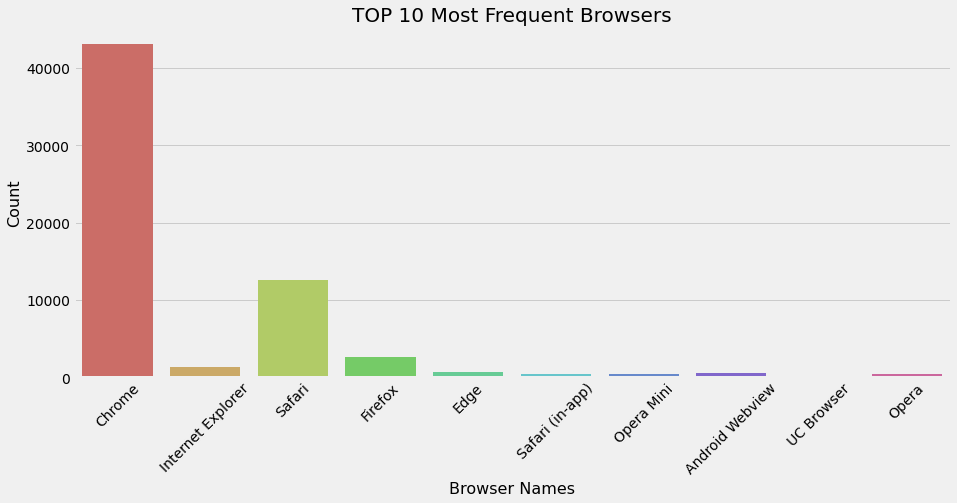

In [33]:
# the top 10 of browsers represent % of total
print("Percentual of Browser usage: ")
print(df_train['device.browser'].value_counts()[:7] ) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,6))

# Let explore the browser used by users
sns.countplot(df_train[df_train['device.browser']\
                       .isin(df_train['device.browser']\
                             .value_counts()[:10].index.values)]['device.browser'], palette="hls") # It's a module to count the category's
plt.title("TOP 10 Most Frequent Browsers", fontsize=20) # Adding Title and seting the size
plt.xlabel("Browser Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

### The Top 5 Browser Make Up More Than 94% of the Total
- TOP 1 - CHROME - 69,08%
- TOP 2 - SAFARI - 20,04%
- TOP 3 - FIREFOX - 3,77%

Nothing new under the sun... Chrome is the most used, followed by Safari and Firefox.


## What If We Cross the Revenue and Browser?


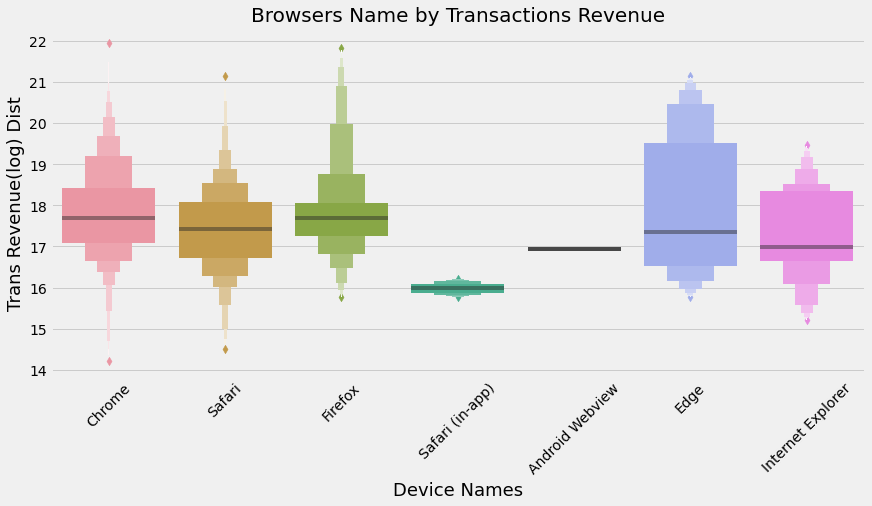

In [34]:
plt.figure(figsize=(13,6)) #figure size

#It's another way to plot our data. using a variable that contains the plot parameters
g1 = sns.boxenplot(x='device.browser', y='totals.transactionRevenue', 
                   data=df_train[(df_train['device.browser'].isin((df_train['device.browser'].value_counts()[:10].index.values))) &
                                  df_train['totals.transactionRevenue'] > 0])
g1.set_title('Browsers Name by Transactions Revenue', fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Device Names', fontsize=18) # Xlabel
g1.set_ylabel('Trans Revenue(log) Dist', fontsize=18) #Ylabel

plt.show()

I think that it's very insightful information.

Chrome has highest values in general but the highest value of transactions was done on Firefox.

We can see a "small" but consistent sales in Safari. Also IE and Edge give some results to Google.

## Let's See the Channel Grouping
 - The channel from which the user came to the Store.

Percentual of Channel Grouping used: 
Organic Search    26406
Social            15947
Direct             9937
Referral           7215
Paid Search        1780
Name: channelGrouping, dtype: int64


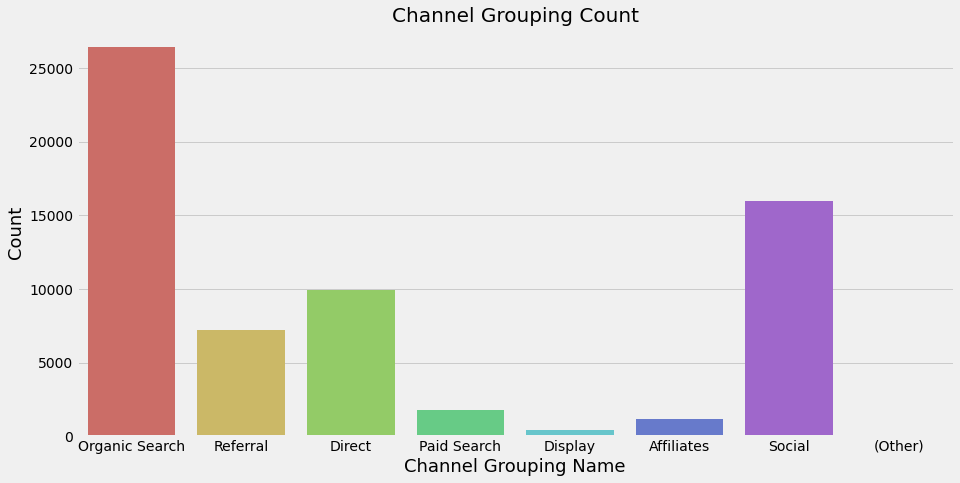

In [35]:
# the top 10 of browsers represent % of total
print("Percentual of Channel Grouping used: ")
print((df_train['channelGrouping'].value_counts()[:5])) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_train["channelGrouping"], palette="hls") # It's a module to count the category's
plt.title("Channel Grouping Count", fontsize=20) # seting the title size
plt.xlabel("Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size

plt.show() #use plt.show to render the graph that we did above

The TOP 5 Grouping Channels represents 97% of total values. 
Respectivelly: 
- TOP 1 => Organic Search - 42.99%
- TOP 2 => Social - 24.39%
- TOP 3 => Direct - 15.42%
- TOP 4 => Referral - 11.89%
- TOP 5 => Paid Search - 2.55%

I have a new question that I will explore further: how is each channel is distributed by browsers? 


## Crossing Channel Grouping x Browsers

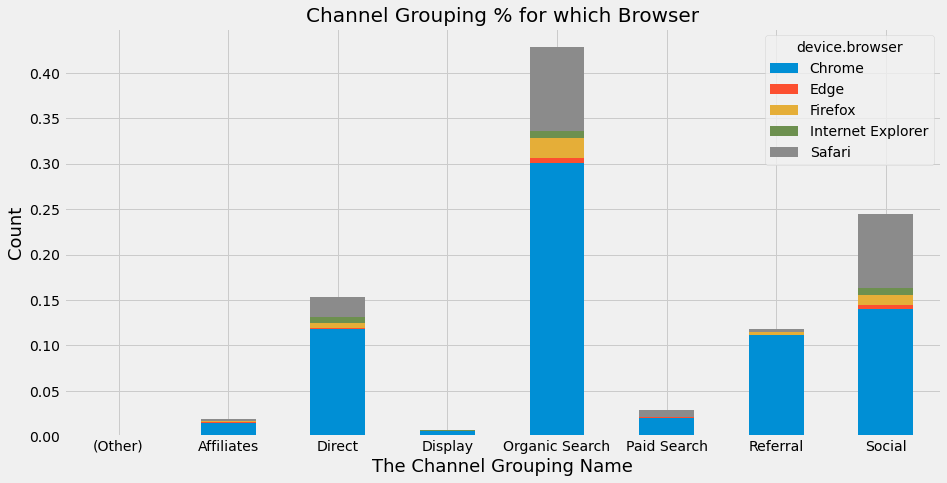

In [36]:
## I will use the crosstab to explore two categorical values

# At index I will use set my variable that I want analyse and cross by another
crosstab_eda = pd.crosstab(index=df_train['channelGrouping'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df_train[df_train['device.browser'].isin(df_train['device.browser']\
                                                                            .value_counts()[:5].index.values)]['device.browser'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Channel Grouping % for which Browser", fontsize=20) # seting the title size
plt.xlabel("The Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
plt.show() # rendering

Very cool! Interesting patterns.

# Operational System 

Percentual of Operational System: 
Windows      24654
Macintosh    17615
Android       8576
iOS           7412
Linux         2416
Name: device.operatingSystem, dtype: int64


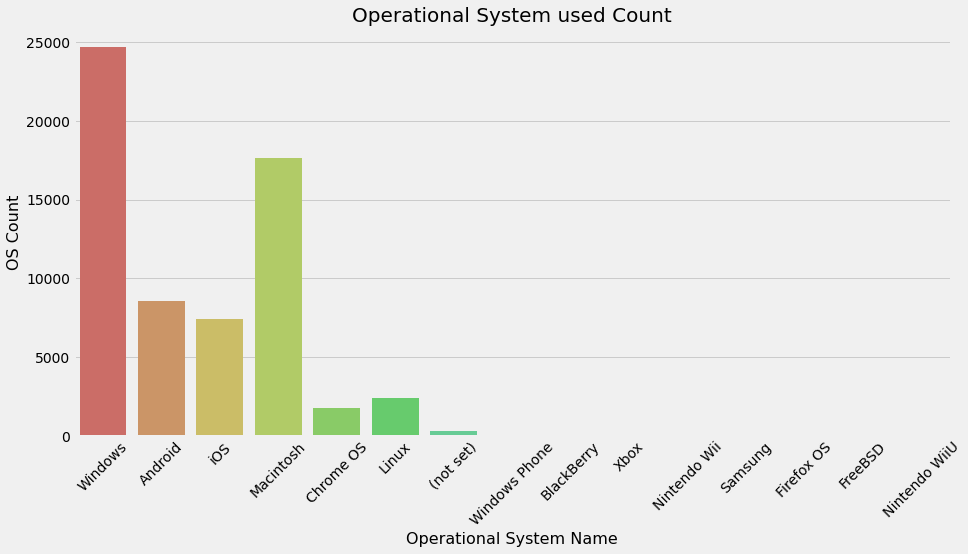

In [37]:
# the top 5 of browsers represent % of total
print("Percentual of Operational System: ")
print(df_train['device.operatingSystem'].value_counts()[:5]) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_train["device.operatingSystem"], palette="hls") # It's a module to count the category's
plt.title("Operational System used Count", fontsize=20) # seting the title size
plt.xlabel("Operational System Name", fontsize=16) # seting the x label size
plt.ylabel("OS Count", fontsize=16) # seting the y label size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

The TOP 5 Operational System correspond to 96%.

TOP 1 => Windows - 38.75% <br>
TOP 2 => Macintosh - 28.04% <br>
TOP 3 => Android - 14.15% <br>
TOP 4 => iOS - 11.75% <br>
TOP 5 => Linux - 3.91% <br>

This is very interesting to me. In my country, Macbook isn't the most common OS. I will investigate further the OS by country.

## Now Let's Investigate the Most Used Brower by Operational System

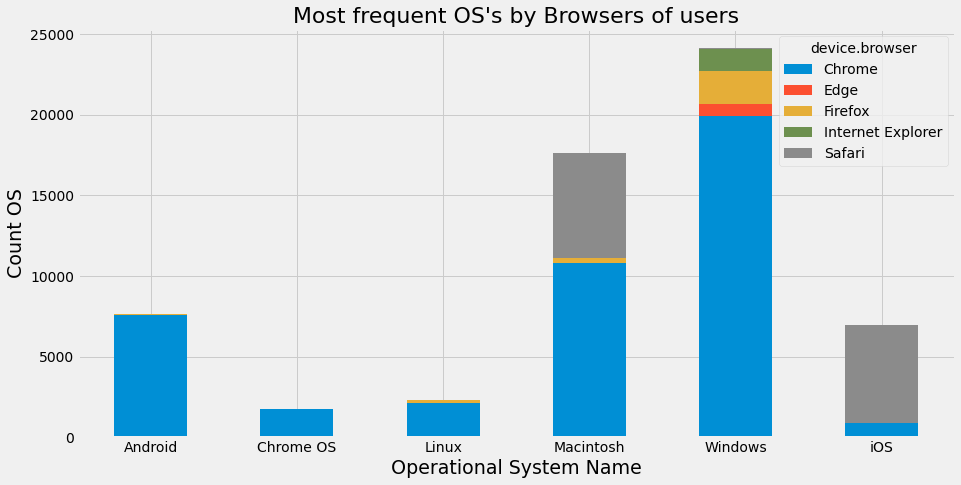

In [38]:

# At index I will use isin to substitute the loop and get just the values with more than 1%
crosstab_eda = pd.crosstab(index=df_train[df_train['device.operatingSystem']\
                                          .isin(df_train['device.operatingSystem']\
                                                .value_counts()[:6].index.values)]['device.operatingSystem'], 
                           
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df_train[df_train['device.browser'].isin(df_train['device.browser']\
                                                                            .value_counts()[:5].index.values)]['device.browser'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Most frequent OS's by Browsers of users", fontsize=22) # adjusting title and fontsize
plt.xlabel("Operational System Name", fontsize=19) # adjusting x label and fontsize
plt.ylabel("Count OS", fontsize=19) # adjusting y label and fontsize
plt.xticks(rotation=0) # Adjust the xticks, rotating the labels

plt.show() # rendering

### Cool! <br>

It's visually clear to see that Chrome is the most used browser in all OS's, except in iOS, which is a mobile OS. 

I will see if we can see a diference between the revenues of transactions.

## I Will Explore the Distribution of Transaction Revenue by Each OS

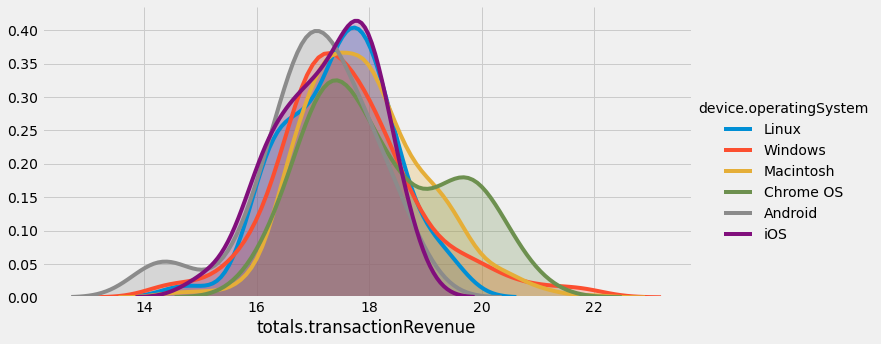

In [39]:
(sns.FacetGrid(df_train[(df_train['device.operatingSystem']\
                        .isin(df_train['device.operatingSystem']\
                              .value_counts()[:6].index.values)) & df_train['totals.transactionRevenue'] > 0],
               hue='device.operatingSystem', height=5, aspect=2)
  .map(sns.kdeplot, 'totals.transactionRevenue', shade=True)
 .add_legend()
)
plt.show()

Cool, we can have a better understanding of the distribution of revenue by OS

## Let's Investigate the Device Category

Percentual of Operational System: 
desktop    73.73
mobile     22.97
tablet      3.30
Name: device.deviceCategory, dtype: float64


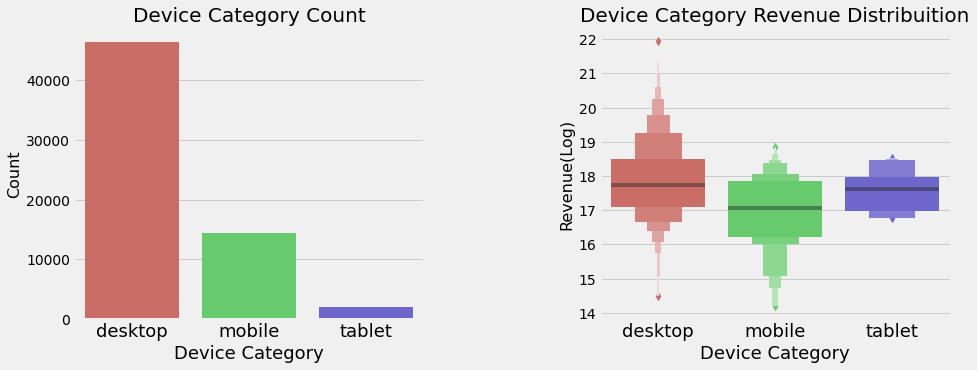

In [40]:
# the top 5 of browsers represent % of total
print("Percentual of Operational System: ")
print(round(df_train['device.deviceCategory'].value_counts() / len(df_train['device.deviceCategory']) * 100, 2)) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
# let explore the browser used by users
sns.countplot(df_train["device.deviceCategory"], palette="hls") # It's a module to count the category's
plt.title("Device Category Count", fontsize=20) # seting the title size
plt.xlabel("Device Category", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=16) # seting the y label size
plt.xticks(fontsize=18) # Adjust the xticks, rotating the labels

plt.subplot(1,2,2)
sns.boxenplot(x="device.deviceCategory", y = 'totals.transactionRevenue', 
              data=df_train[df_train['totals.transactionRevenue'] > 0], palette="hls") # It's a module to count the category's
plt.title("Device Category Revenue Distribuition", fontsize=20) # seting the title size
plt.xlabel("Device Category", fontsize=18) # seting the x label size
plt.ylabel("Revenue(Log)", fontsize=16) # seting the y label size
plt.xticks(fontsize=18) # Adjust the xticks, rotating the labels

plt.subplots_adjust(hspace = 0.9, wspace = 0.5)

plt.show() #use plt.show to render the graph that we did above

Percentage wise, we can see that:

- desktop represents 73.5%
- mobile represents 23.12%
- tablet represents 3.38%

I thought that the revenue is almost all from desktop. Let's explore it further.

## Let's See the Difference Distribution Between Devices

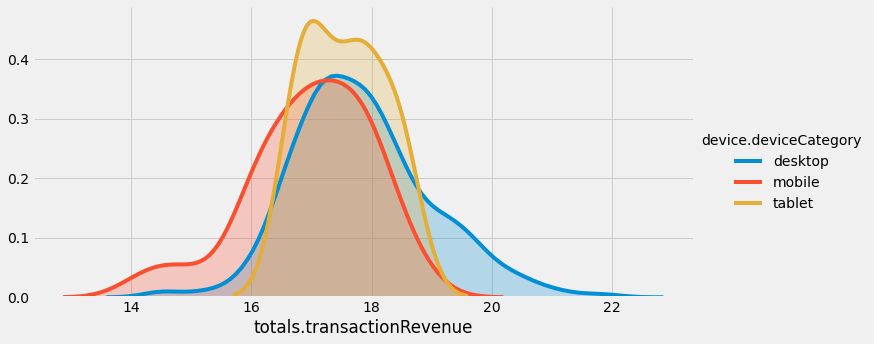

In [41]:
(sns.FacetGrid(df_train[df_train['totals.transactionRevenue'] > 0],
               hue='device.deviceCategory', height=5, aspect=2)
  .map(sns.kdeplot, 'totals.transactionRevenue', shade=True)
 .add_legend()
)
plt.show()

## Now, Let's Investigate the Device Category by Browsers

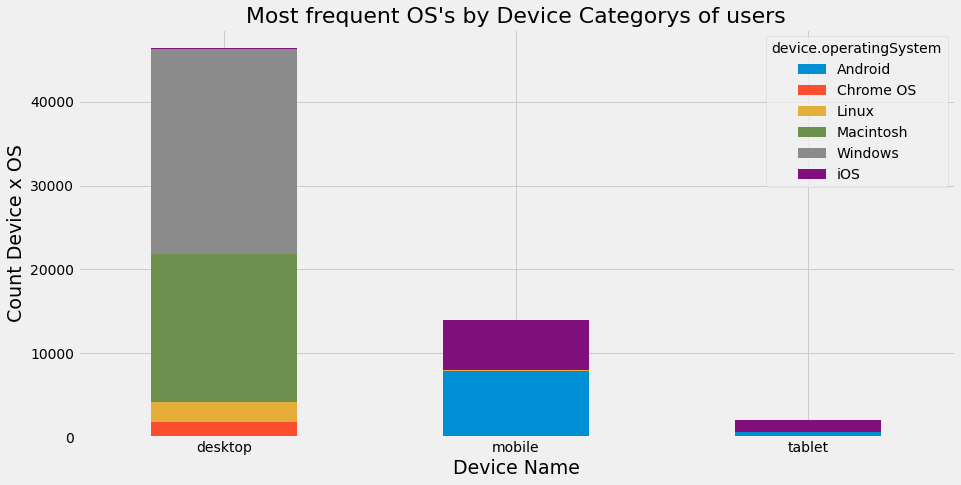

In [42]:
# At index I will use isin to substitute the loop and get just the values with more than 1%
crosstab_eda = pd.crosstab(index=df_train['device.deviceCategory'], # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df_train[df_train['device.operatingSystem']\
                                            .isin(df_train['device.operatingSystem']\
                                                  .value_counts()[:6].index.values)]['device.operatingSystem'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Most frequent OS's by Device Categorys of users", fontsize=22) # adjusting title and fontsize
plt.xlabel("Device Name", fontsize=19)                # adjusting x label and fontsize
plt.ylabel("Count Device x OS", fontsize=19)                               # adjusting y label and fontsize
plt.xticks(rotation=0)                                            # Adjust the xticks, rotating the labels


plt.show() # rendering

Very interesting values.

# SubContinent 

Description of SubContinent count: 
Northern America    27031
Southeast Asia       5441
Western Europe       4200
Southern Asia        4108
Northern Europe      4032
Eastern Asia         3314
Eastern Europe       3102
South America        3024
Name: geoNetwork.subContinent, dtype: int64


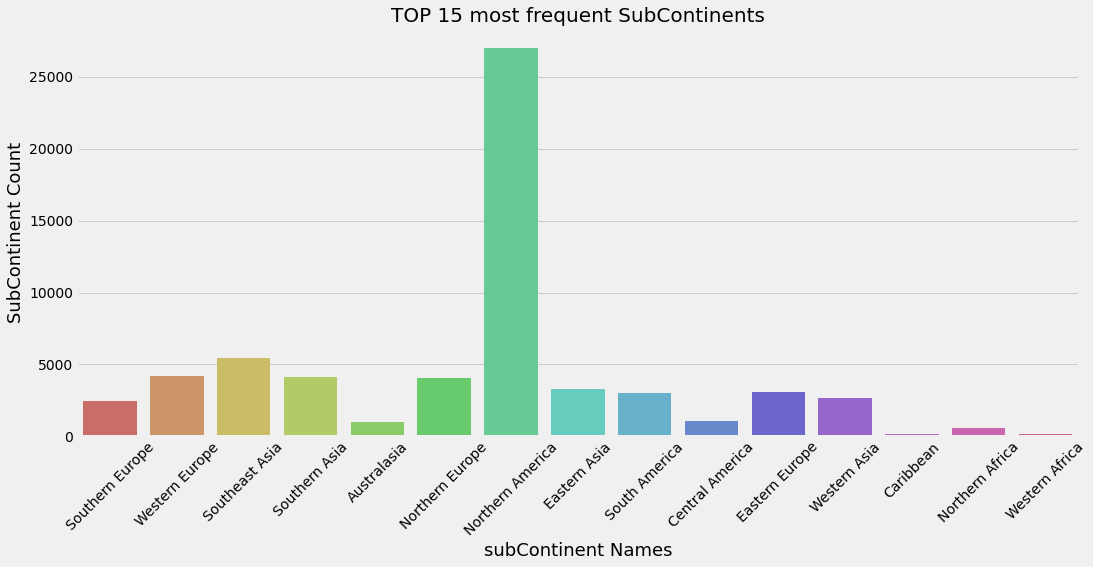

In [43]:
# the top 8 of browsers represent % of total
print("Description of SubContinent count: ")
print(df_train['geoNetwork.subContinent'].value_counts()[:8]) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(16,7))

# let explore the browser used by users
sns.countplot(df_train[df_train['geoNetwork.subContinent']\
                       .isin(df_train['geoNetwork.subContinent']\
                             .value_counts()[:15].index.values)]['geoNetwork.subContinent'], palette="hls") # It's a module to count the category's
plt.title("TOP 15 most frequent SubContinents", fontsize=20) # seting the title size
plt.xlabel("subContinent Names", fontsize=18) # seting the x label size
plt.ylabel("SubContinent Count", fontsize=18) # seting the y label size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

Wow, We have a very high number of users from North America. 

TOP 5 regions are equivalent of almost 70% +-  of total 

TOP 1 => Northern America - 44.18% <br>
TOP 2 => Southeast Asia - 8.29% <br>
TOP 3 => Northern Europe - 6.73% <br>
TOP 4 => Southern Asia - 6.33% <br>
TOP 5 => Western Europe - 6.23% <br>

## Let's Cross the SubContinent by Browser

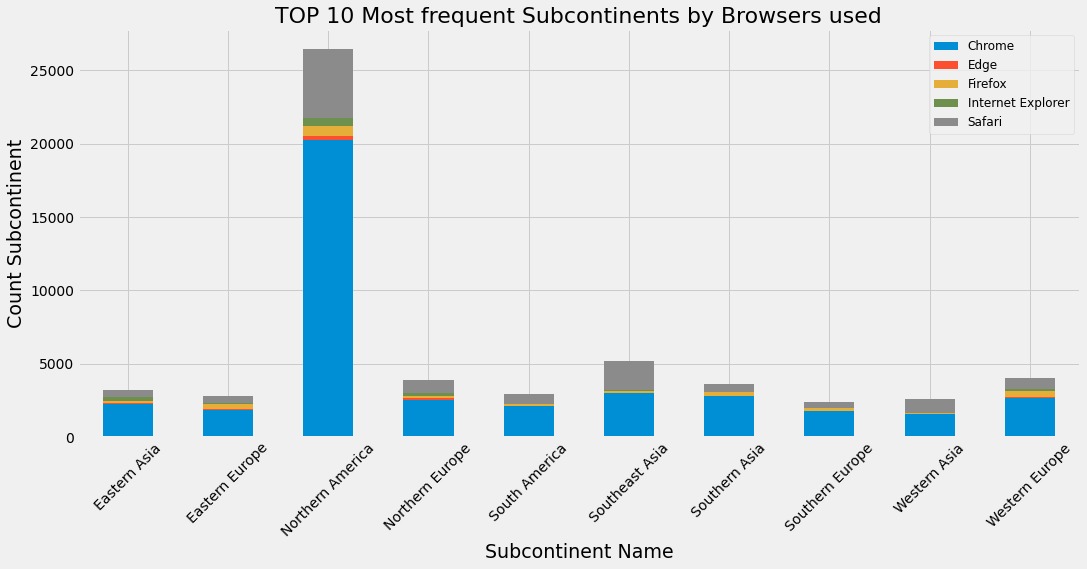

In [44]:
## I will use the crosstab to explore two categorical values

# At index I will use isin to substitute the loop and get just the values with more than 1%
crosstab_eda = pd.crosstab(index=df_train[df_train['geoNetwork.subContinent']\
                                          .isin(df_train['geoNetwork.subContinent']\
                                                .value_counts()[:10].index.values)]['geoNetwork.subContinent'], 
                           
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df_train[df_train['device.browser'].isin(df_train['device.browser']\
                                                                            .value_counts()[:5].index.values)]['device.browser'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(16,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("TOP 10 Most frequent Subcontinents by Browsers used", fontsize=22) # adjusting title and fontsize
plt.xlabel("Subcontinent Name", fontsize=19) # adjusting x label and fontsize
plt.ylabel("Count Subcontinent", fontsize=19) # adjusting y label and fontsize
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels
plt.legend(loc=1, prop={'size': 12}) # to 

plt.show() # rendering

Nice, this graph is very insightful.
North America has a low ratio of Safari x Chrome... I thought that it was the contrary.

Firefox has a relatively high presence in North America too.

In [45]:
print('train date:', min(df_train['date']), 'to', max(df_train['date']))

train date: 2016-08-01 00:00:00 to 2017-08-01 00:00:00


In [46]:
year = df_train['_year'].value_counts()         # counting the Year with value counts
month = df_train['_month'].value_counts()      # coutning months
weeday = df_train['_weekday'].value_counts()    # Couting weekday
day = df_train['_day'].value_counts()              # counting Day
date = df_train['date'].value_counts()           # Counting date

## Interactive Date Features

## First I Will Explore Revenue and Number of Visits By Day

In [47]:
# I saw and take a lot of inspiration to this interactive plots in kernel: 
# https://www.kaggle.com/jsaguiar/complete-exploratory-analysis-all-columns
# I learned a lot in this kernel and I will implement and adapted some ideas

#seting some static color options
color_op = ['#5527A0', '#BB93D7', '#834CF7', '#6C941E', '#93EAEA', '#7425FF', '#F2098A', '#7E87AC', 
            '#EBE36F', '#7FD394', '#49C35D', '#3058EE', '#44FDCF', '#A38F85', '#C4CEE0', '#B63A05', 
            '#4856BF', '#F0DB1B', '#9FDBD9', '#B123AC']

# Visits by time train

# couting all entries by date to get number of visits by each date
dates_temp = df_train['date'].value_counts().to_frame().reset_index().sort_values('index') 
# renaming the columns to apropriate names
dates_temp = dates_temp.rename(columns = {"date" : "visits"}).rename(columns = {"index" : "date"})

# creating the first trace with the necessary parameters
trace = go.Scatter(x=dates_temp.date.astype(str), y=dates_temp.visits,
                    opacity = 0.8, line = dict(color = color_op[3]), name= 'Visits by day')

# Below we will get the total values by Transaction Revenue Log by date
dates_temp_sum = df_train.groupby('date')['totals.transactionRevenue'].sum().to_frame().reset_index()

# using the new dates_temp_sum we will create the second trace
trace1 = go.Scatter(x=dates_temp_sum.date.astype(str), line = dict(color = color_op[1]), name="RevenueLog by day",
                        y=dates_temp_sum['totals.transactionRevenue'], opacity = 0.8)

# Getting the total values by Transactions by each date
dates_temp_count = df_train[df_train['totals.transactionRevenue'] > 0].groupby('date')['totals.transactionRevenue'].count().to_frame().reset_index()

# using the new dates_temp_count we will create the third trace
trace2 = go.Scatter(x=dates_temp_count.date.astype(str), line = dict(color = color_op[5]), name="Sellings by day",
                        y=dates_temp_count['totals.transactionRevenue'], opacity = 0.8)

#creating the layout the will allow us to give an title and 
# give us some interesting options to handle with the outputs of graphs
layout = dict(
    title= "Informations by Date",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=3, label='3m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible = True),
        type='date'
    )
)

# creating figure with the both traces and layout
fig = dict(data= [trace, trace1, trace2], layout=layout)

#rendering the graphs
iplot(fig) #it's an equivalent to plt.show()

### Creating a Sophistcated Interactive graphic to Better Understand Date Features

To see the code click on "code".

## Select the Option

In [48]:
# Setting the first trace
trace1 = go.Histogram(x=df_train["_year"],
                      name='Year Count')

# Setting the second trace
trace2 = go.Histogram(x=df_train["_month"],
                name='Month Count')

# Setting the third trace
trace3 = go.Bar(y=day.values,
                x=day.index.values, 
                name='Day Count')

# Setting the fourth trace
trace4 = go.Bar(y=weeday.values,
                x=weeday.index.values,
                name='Weekday Count')

# puting all traces in the same "array of graphics" to we render it below
data = [trace1, trace2, trace4, trace3]

#Creating the options to be posible we use in our 
updatemenus = list([
    dict(active=-1,
         x=-0.15,
         buttons=list([  
             dict(
                 label = 'Years Count',
                 method = 'update',
                 args = [{'visible': [True, False, False, False,False]}, 
                         {'title': 'Count of Year'}]),
             dict(
                 label = 'Months Count',
                 method = 'update',
                 args = [{'visible': [False, True, False, False,False]},
                         {'title': 'Count of Months'}]),
             dict(
                 label = 'WeekDays Count',
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False]},
                         {'title': 'Count of WeekDays'}]),
            dict(
                label = 'Days Count ',
                method = 'update',
                args = [{'visible': [False, False, False, True,False]},
                        {'title': 'Count of Day'}]) ])
    )
])


layout = dict(title='The percentual Distribuitions of Date Features (Select from Dropdown)',
              showlegend=False,
              updatemenus=updatemenus,
#              xaxis = dict(
#                  type="category"
#                      ),
              barmode="group"
             )
fig = dict(data=data, layout=layout)
print("SELECT BELOW: ")
iplot(fig)

SELECT BELOW: 


******* *How can I set order to my year, months and days?* *******

### Very Cool graphs

We can see that the number of accesses are clearly decreasing over time. 

- The months with the most accesses are October and November.
- On the weekend the traffic is lower than other days.
- The 5 days with highest number of accesses is 1 and 5
- Considering the full count of dates, we can see that the days with highest accesses are almost all in november/2016


#### Let's investigate the VisitHour and weekday to see if we can find some interesting patterns

In [49]:
date_sales = ['_visitHour', '_weekday'] #seting the desired 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[date_sales[0]], df_train[date_sales[1]], 
            values=df_train["totals.transactionRevenue"], aggfunc=[np.sum]).style.background_gradient(cmap = cm)

# tab.columns.levels[1] = ["Sun", "Mon", "Thu", "wed", "Thi","Fri","Sat"]

Very interesting, we can see that from 17  to 20 hour we have the highest numbers of 

## I Will Use an Interesting Graphic Called Squarify 
- I will apply it on the feature Country to discover where the user access the store.

In [50]:
number_of_colors = 20 # total number of different collors that we will use

# Here I will generate a bunch of hexadecimal colors 
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

## Exploring Countries

Description most frequent countrys: 
United States     25235
India              3537
United Kingdom     2569
Canada             1789
Vietnam            1746
Turkey             1460
Brazil             1460
Thailand           1441
Germany            1426
Japan              1416
France             1158
Mexico              934
Taiwan              920
Australia           884
Spain               829
Name: geoNetwork.country, dtype: int64


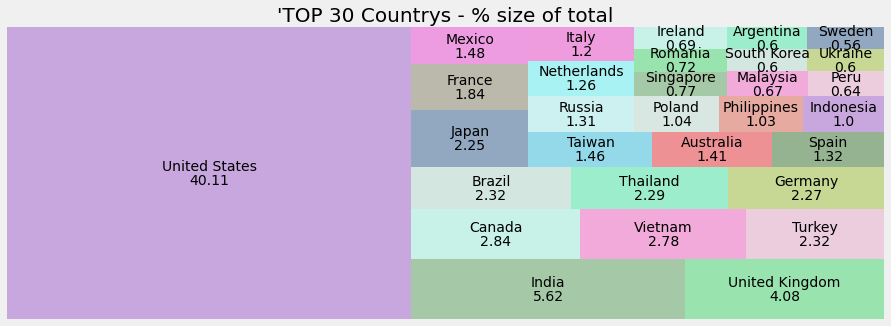

In [51]:
country_tree = df_train["geoNetwork.country"].value_counts() #counting the values of Country

print("Description most frequent countrys: ")
print(country_tree[:15]) #printing the 15 top most 

country_tree = round((df_train["geoNetwork.country"].value_counts()[:30] \
                       / len(df_train['geoNetwork.country']) * 100),2)

plt.figure(figsize=(14,5))
g = squarify.plot(sizes=country_tree.values, label=country_tree.index, 
                  value=country_tree.values,
                  alpha=.4, color=color)
g.set_title("'TOP 30 Countrys - % size of total",fontsize=20)
g.set_axis_off()
plt.show()

USA has a higher value than any other country. 

Below I will take a look at cities and find for the highest revenues from them


## Now, I Will Look on the City Feature and See the Principal Cities in the Dataset

In [52]:
df_train.loc[df_train["geoNetwork.city"] == "not available in demo dataset", 'geoNetwork.city'] = np.nan

Description most frequent Citys: 
Mountain View       2850
(not set)           2284
New York            1824
San Francisco       1369
Sunnyvale            937
London               859
San Jose             722
Los Angeles          609
Bangkok              550
Chicago              537
Ho Chi Minh City     506
Istanbul             437
Bengaluru            378
Hanoi                359
Sydney               358
Name: geoNetwork.city, dtype: int64


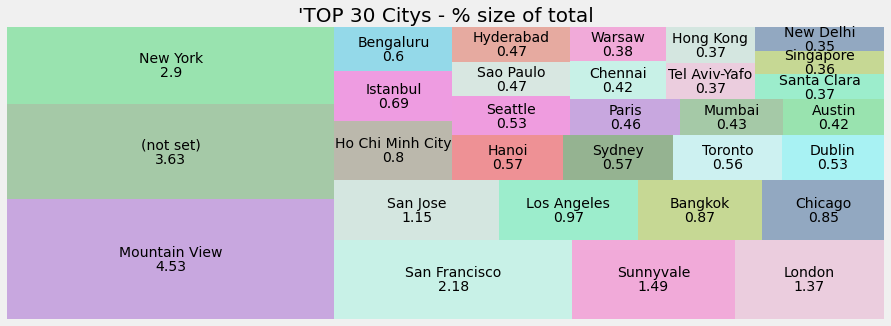

In [53]:
city_tree = df_train["geoNetwork.city"].value_counts() #counting 

print("Description most frequent Citys: " )
print(city_tree[:15])

city_tree = round((city_tree[:30] / len(df_train['geoNetwork.city']) * 100),2)

plt.figure(figsize=(14,5))
g = squarify.plot(sizes=city_tree.values, label=city_tree.index, 
                  value=city_tree.values,
                  alpha=.4, color=color)
g.set_title("'TOP 30 Citys - % size of total",fontsize=20)
g.set_axis_off()
plt.show()

Nicely distributed clients that accessed the store. 
(non set) have 3.81% of total, so I won't consider it in top five, but it was the second-most frequent. 

The top 5 are:
- Montain View
- New York 
- San Francisco
- Sunnyvale 
- London

How are Countries and Cities in terms of money? 


____________________

### Creating a Function with plotly to Better Investigate the Dataset

- Click On "code" to see the commented code

In [54]:
def PieChart(df_colum, title, limit=15):
    """
    This function helps to investigate the proportion of visits and total of transction revenue 
    by each category
    """

    count_trace = df_train[df_colum].value_counts()[:limit].to_frame().reset_index()
    rev_trace = df_train.groupby(df_colum)["totals.transactionRevenue"].sum().nlargest(10).to_frame().reset_index()

    trace1 = go.Pie(labels=count_trace['index'], values=count_trace[df_colum], name= "% Acesses", hole= .5, 
                    hoverinfo="label+percent+name", showlegend=True,domain= {'x': [0, .48]}, 
                    marker=dict(colors=color))

    trace2 = go.Pie(labels=rev_trace[df_colum], 
                    values=rev_trace['totals.transactionRevenue'], name="% Revenue", hole= .5, 
                    hoverinfo="label+percent+name", showlegend=False, domain= {'x': [.52, 1]})

    layout = dict(title= title, height=450, font=dict(size=15),
                  annotations = [
                      dict(
                          x=.25, y=.5,
                          text='Visits', 
                          showarrow=False,
                          font=dict(size=20)
                      ),
                      dict(
                          x=.80, y=.5,
                          text='Revenue', 
                          showarrow=False,
                          font=dict(size=20)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    iplot(fig)

## Device Category feature

In [55]:
PieChart("device.deviceCategory", "Device Category")

## I Will Apply the Pie Chart on Countries Again

In [56]:
# call the function
PieChart("geoNetwork.city", "Top Cities by Accesses and Revenue", limit=12)

- New York is responsible for 14% of visits and 31% of revenues.
- Montain View has 19% of visists but just 16% of revenues
- Chicago has just 3.5% of visits but has a high significance of revenues

## Seeing Again Channel Grouping More Specified

In [57]:
PieChart("channelGrouping", "Channel Grouping Visits and Revenues")

It's interesting to note that Referral have a smaller number of Visits but is responsible for almost 40% of revenues.

### Months in Pizza Graph

## Let's See the NetWork Domain
- I will plot visits and revenues by each category, including the non-set and unknown accesses and revenues.


In [58]:
PieChart('geoNetwork.networkDomain', "Network Domain")

Wow, more very cool information. 

- (not set) domain has almost 50% of total visits and 62% of revenue.
- Unknown is responsible for 28% of visits but just 2.70% of revenue.
- comcast.net have 5.5% of visits and 7.4% revenue.

Let's take a look at Mobile and Browser proportions.

In [59]:
PieChart("device.deviceCategory", "Device Category")

The biggest part of revenues are from Desktop Devices.

## Trafic Source Medium

In [60]:
PieChart("trafficSource.medium", "Trafic Source - Medium")

- Organic has the highest number of visits but is the third in revenues.
- Referral has almost 40% in both visits and revenues.
- The none category has almost 16% of visits but almost 40% of revenues.

Now I will take a look on trafficSource section, the Source that accessed the store.

In [61]:
PieChart('trafficSource.source', "Visits and Revenue by TOP Sources", limit=8)

We have a high number of visits from Youtube but 0 sales.

the mall.googleplex has a low number of accesses but has the highest value in revenue.

# I Will Continue This Notebook! Vote Up the Kernel and Stay Tuned for the Next Updates

In [62]:
df_train.corr()['totals.transactionRevenue']

visitId                                     0.007497
visitNumber                                 0.024138
visitStartTime                              0.007497
device.isMobile                            -0.044828
totals.visits                                    NaN
totals.hits                                 0.395679
totals.pageviews                            0.421583
totals.bounces                             -0.116807
totals.newVisits                           -0.109794
totals.transactionRevenue                   1.000000
trafficSource.isTrueDirect                  0.080149
trafficSource.adwordsClickInfo.isVideoAd   -0.007969
_weekday                                   -0.017480
_day                                        0.003821
_month                                     -0.003971
_year                                       0.006428
_visitHour                                  0.039010
Name: totals.transactionRevenue, dtype: float64

Here is the crosstab with heatmap:

In [63]:
country_repayment = ['channelGrouping', '_weekday'] #seting the desired 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[country_repayment[0]], df_train[country_repayment[1]], 
            values=df_train["totals.transactionRevenue"], aggfunc=[np.sum]).style.background_gradient(cmap = cm)

# tab.columns.levels[1] = ["Sun", "Mon", "Thu", "wed", "Thi","Fri","Sat"]

##  Geolocation Plot to Visually Understand the Data

In [64]:
# Counting total visits by countrys
countMaps = pd.DataFrame(df_train['geoNetwork.country'].value_counts()).reset_index()
countMaps.columns=['country', 'counts'] #renaming columns
countMaps = countMaps.reset_index().drop('index', axis=1) #reseting index and droping the column

data = [ dict(
        type = 'choropleth',
        locations = countMaps['country'],
        locationmode = 'country names',
        z = countMaps['counts'],
        text = countMaps['country'],
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Visits'),
      ) ]

layout = dict(
    title = 'Couting Visits Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

figure = dict( data=data, layout=layout )
iplot(figure, validate=False, filename='map-countrys-count')

## Total Revenue by Country 

In [65]:
# I will crete a variable of Revenues by country sum
sumRevMaps = df_train[df_train['totals.transactionRevenue'] > 0].groupby("geoNetwork.country")["totals.transactionRevenue"].count().to_frame().reset_index()
sumRevMaps.columns = ["country", "count_sales"] # renaming columns
sumRevMaps = sumRevMaps.reset_index().drop('index', axis=1) #reseting index and drop index column

data = [ dict(
        type = 'choropleth',
        locations = sumRevMaps['country'],
        locationmode = 'country names',
        z = sumRevMaps['count_sales'],
        text = sumRevMaps['country'],
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Count of Sales'),
      ) ]

layout = dict(
    title = 'Total Sales by Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

figure = dict( data=data, layout=layout )

iplot(figure, validate=False, filename='map-countrys-total')

### Some Tests That I Am Doing to Try Find Interesting Feature Engineering Approaches

In [67]:
df_train['month_unique_user_count'] = df_train.groupby('_month')['fullVisitorId'].transform('nunique')
df_train['day_unique_user_count'] = df_train.groupby('_day')['fullVisitorId'].transform('nunique')
df_train['weekday_unique_user_count'] = df_train.groupby('_weekday')['fullVisitorId'].transform('nunique')


df_train['traf_sourc_browser_count'] = df_train.groupby(['trafficSource.medium', 'device.browser'])['totals.pageviews'].transform('nunique')
df_train['Id_browser_pageviews_sumprod'] = df_train.groupby(['fullVisitorId', 'device.browser'])['totals.pageviews'].transform('cumprod')
df_train['Id_browser_hits_sumprod'] = df_train.groupby(['fullVisitorId', 'device.browser'])['totals.hits'].transform('cumprod')
df_train['Id_browser_hits_sumprod'] = df_train.groupby(['fullVisitorId', 'device.browser'])['totals.hits'].transform('cumprod')
df_train['Id_browser_hits_sumprod_mob'] = df_train.groupby(['fullVisitorId', 'device.browser', 'device.isMobile'])['totals.hits'].transform('sum')

df_train['Id_networkDomain_hits'] = df_train.groupby(['fullVisitorId', 'geoNetwork.networkDomain'])['totals.hits'].transform('var')
# df_train['Id_networkDomain_country_hits'] = df_train.groupby(['fullVisitorId', 'geoNetwork.networkDomain', 'geoNetwork.country'])['totals.hits'].transform(lambda x: x.unique())



In [69]:
# df_train[["totals.transactionRevenue", 'Id_browser_hits_sumprod', 'Id_networkDomain_hits','Id_networkDomain_country_hits', 'Id_browser_hits_sumprod_mob']].corr()

## Preprocessing the Full Dataset and Creating New Features

In [70]:
aggs = {
    'date': ['min', 'max'],
    'totals.hits': ['sum', 'min', 'max', 'mean', 'median'],
    'totals.pageviews': ['sum', 'min', 'max', 'mean', 'median'],
    'totals.bounces': ['sum', 'mean', 'median'],
    'totals.newVisits': ['sum', 'mean', 'median']
}

# Previous applications categorical features
cat_aggregations = {}

for cat in dummy_feaures:
    cat_aggregations[cat] = ['min', 'max', 'mean']

prev_agg = df_train.groupby('fullVisitorId').agg({**aggs})

prev_agg.columns = pd.Index(['Agg_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

In [71]:
prev_agg

,Agg_date_MIN,Agg_date_MAX,Agg_totals.hits_SUM,Agg_totals.hits_MIN,Agg_totals.hits_MAX,Agg_totals.hits_MEAN,Agg_totals.hits_MEDIAN,Agg_totals.pageviews_SUM,Agg_totals.pageviews_MIN,Agg_totals.pageviews_MAX,Agg_totals.pageviews_MEAN,Agg_totals.pageviews_MEDIAN,Agg_totals.bounces_SUM,Agg_totals.bounces_MEAN,Agg_totals.bounces_MEDIAN,Agg_totals.newVisits_SUM,Agg_totals.newVisits_MEAN,Agg_totals.newVisits_MEDIAN
fullVisitorId,,,,,,,,,,,,,,,,,,
0000253133284033056,2016-08-09,2016-08-09,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1.0,1.0,1,1.0,1.0,1,1.0,1.0
0000485418944539313,2016-11-30,2016-11-30,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1.0,1.0,1,1.0,1.0,1,1.0,1.0
0000538867824729259,2016-11-30,2016-11-30,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1.0,1.0,1,1.0,1.0,1,1.0,1.0
0001363886612345162,2016-08-25,2016-08-25,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1.0,1.0,1,1.0,1.0,0,0.0,0.0
0001470333569636601,2016-10-30,2016-10-30,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1.0,1.0,1,1.0,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998640187687936173,2016-12-01,2016-12-01,0.004149,0.004149,0.004149,0.004149,0.004149,3,3,3,3.0,3.0,0,0.0,0.0,0,0.0,0.0
9998934071327847425,2017-01-10,2017-01-10,0.010373,0.010373,0.010373,0.010373,0.010373,6,6,6,6.0,6.0,0,0.0,0.0,1,1.0,1.0
9998955356642683968,2017-07-26,2017-07-26,0.033195,0.033195,0.033195,0.033195,0.033195,10,10,10,10.0,10.0,0,0.0,0.0,1,1.0,1.0


In [72]:
new_columns = [
        k + '_' + agg for k in aggs.keys() for agg in aggs[k]
    ]
new_columns

['date_min',
 'date_max',
 'totals.hits_sum',
 'totals.hits_min',
 'totals.hits_max',
 'totals.hits_mean',
 'totals.hits_median',
 'totals.pageviews_sum',
 'totals.pageviews_min',
 'totals.pageviews_max',
 'totals.pageviews_mean',
 'totals.pageviews_median',
 'totals.bounces_sum',
 'totals.bounces_mean',
 'totals.bounces_median',
 'totals.newVisits_sum',
 'totals.newVisits_mean',
 'totals.newVisits_median']

In [73]:
dummy_feaures

['channelGrouping',
 'device.browser',
 'device.deviceCategory',
 'geoNetwork.city',
 'device.operatingSystem',
 'trafficSource.medium',
 'trafficSource.source',
 'geoNetwork.continent',
 'geoNetwork.country',
 'geoNetwork.metro',
 'geoNetwork.networkDomain',
 'geoNetwork.region',
 'geoNetwork.subContinent']

In [74]:
### Testing some grouping approaches

In [75]:
df_train['cumcount'] = df_train.groupby('fullVisitorId').cumcount() + 1

Some tests to feature engineering

In [76]:
aggs = {
    'date': ['min', 'max'],
    'totals.transactionRevenue': ['sum', 'size'],
    'totals.hits': ['sum', 'min', 'max', 'count', 'median'],
    'totals.pageviews': ['sum', 'min', 'max', 'mean', 'median'],
    'totals.bounces': ['sum', 'mean', 'median'],
    'totals.newVisits': ['sum', 'mean', 'median']
}

# Previous applications categorical features
cat_aggregations = {}

for cat in dummy_feaures:
    cat_aggregations[cat] = ['min', 'max', 'mean']

prev_agg = df_train.groupby('fullVisitorId').agg({**aggs})

prev_agg.head()



date            totals.transactionRevenue       \
                           min        max                       sum size   
fullVisitorId                                                              
0000253133284033056 2016-08-09 2016-08-09                       0.0    1   
0000485418944539313 2016-11-30 2016-11-30                       0.0    1   
0000538867824729259 2016-11-30 2016-11-30                       0.0    1   
0001363886612345162 2016-08-25 2016-08-25                       0.0    1   
0001470333569636601 2016-10-30 2016-10-30                       0.0    1   

                    totals.hits                        totals.pageviews      \
                            sum  min  max count median              sum min   
fullVisitorId                                                                 
0000253133284033056         0.0  0.0  0.0     1    0.0                1   1   
0000485418944539313         0.0  0.0  0.0     1    0.0                1   1   
0000538867824729259         0.0  0.0  0.0     1    0.0                1   1   
0001363886612345162         0.0  0.0  0.0     1    0.0                1   1   
0001470333569636601         0.0  0.0  0.0     1    0.0                1   1   

                                    totals.bounces              \
                    max mean median            sum mean median   
fullVisitorId                                                    
0000253133284033056   1  1.0    1.0              1  1.0    1.0   
0000485418944539313   1  1.0    1.0              1  1.0    1.0   
0000538867824729259   1  1.0    1.0              1  1.0    1.0   
0001363886612345162   1  1.0    1.0              1  1.0    1.0   
0001470333569636601   1  1.0    1.0              1  1.0    1.0   

                    totals.newVisits              
                                 sum mean median  
fullVisitorId                                     
0000253133284033056                1  1.0    1.0  
0000485418944539313                1  1.0    1.0  
0000538867824729259                1  1.0    1.0  
0001363886612345162                0  0.0    0.0  
0001470333569636601                1  1.0    1.0

# I Will Continue Working on This Kernel, Stay Tuned

Please, if you liked this kernel don't forget to votes up and give your feedback

In [77]:
prev_agg.columns = ["_".join(x) for x in prev_agg.columns.ravel()]

In [78]:
prev_agg.head()

,date_min,date_max,totals.transactionRevenue_sum,totals.transactionRevenue_size,totals.hits_sum,totals.hits_min,totals.hits_max,totals.hits_count,totals.hits_median,totals.pageviews_sum,totals.pageviews_min,totals.pageviews_max,totals.pageviews_mean,totals.pageviews_median,totals.bounces_sum,totals.bounces_mean,totals.bounces_median,totals.newVisits_sum,totals.newVisits_mean,totals.newVisits_median
fullVisitorId,,,,,,,,,,,,,,,,,,,,
0000253133284033056,2016-08-09,2016-08-09,0.0,1,0.0,0.0,0.0,1,0.0,1,1,1,1.0,1.0,1,1.0,1.0,1,1.0,1.0
0000485418944539313,2016-11-30,2016-11-30,0.0,1,0.0,0.0,0.0,1,0.0,1,1,1,1.0,1.0,1,1.0,1.0,1,1.0,1.0
0000538867824729259,2016-11-30,2016-11-30,0.0,1,0.0,0.0,0.0,1,0.0,1,1,1,1.0,1.0,1,1.0,1.0,1,1.0,1.0
0001363886612345162,2016-08-25,2016-08-25,0.0,1,0.0,0.0,0.0,1,0.0,1,1,1,1.0,1.0,1,1.0,1.0,0,0.0,0.0
0001470333569636601,2016-10-30,2016-10-30,0.0,1,0.0,0.0,0.0,1,0.0,1,1,1,1.0,1.0,1,1.0,1.0,1,1.0,1.0
